In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import seaborn as sns
from numpy import linalg as LA
import plotly.graph_objects as go

In [2]:
# ideas:
# Use dimensionality reduction to extract meaningful data from dataset
# (data with more variance) -- 

# which strains HELP anxiety
# which strains HURT anxiety
# classify indica, sativa (logistic-regression)
# Feature Engineering: ----------------------------
# ratio--> total thc : total cbd
# 
# using strains known to be good for anxiety 
# -- what strains may be in the same family

In [3]:
# import cannabis data
df = pd.read_csv('Canna.csv')

In [4]:
# array of unimportant features to drop from the df
# ** TotalTHC == THC (repetitive data)
to_drop = ['ProjectURL',
           'CBN',
           'H2O',
           'ReportType',
           'DateRecorded',
           'OCPID',
           'SampleID',
           'ChemicalLab',
           'TotalTHC',
           'Δ8-THC',
           'THCV',
           'CBDV',
           'Study',
           'StudyURL',
           'Run',
           'RunURL',
           'DatePublished',
           'Spots',
           'Bases',
           'Size',
           'Notes', 
           'SampleURL',
           'Organism',
           'OrganismURL',
           'Project',
           'GeneticLab',
           'Sample']

df.drop(to_drop, inplace=True, axis=1)

# storing strain values in as strains pandas series
# --separante non-numerical data from the df
strains = df['Strain']
df.drop('Strain', inplace=True, axis=1)

In [5]:
# use all chemical data available -- 256 samples
df = df[:255]
display(df)

,THC,Δ9-THC,THCA,TotalCBD,CBDA,CBDVA,CBC,CBG,α-Pinene,Camphene,...,Linalool,Isopulegol,Geraniol,β-Caryophyllene,α-Humelene,Nerolidol-1,Nerolidol-2,Guaiol,CaryophylleneOxide,α-Bisabolol
0,193.00,0.00,203.0,0.00,0.00,NaN,NaN,NaN,0.18,0.04,...,0.37,0.0,0.0,5.48,2.03,0.0,0.00,0.00,0.0,0.87
1,0.00,0.00,0.0,140.00,147.00,NaN,NaN,NaN,0.16,0.03,...,0.25,0.0,0.0,2.35,1.14,0.0,0.00,0.25,0.0,0.62
2,141.00,0.00,138.0,56.00,55.00,NaN,NaN,NaN,0.22,0.04,...,0.39,0.0,0.0,3.11,1.20,0.0,0.00,0.20,0.0,0.32
3,75.00,0.00,79.0,38.00,40.00,NaN,NaN,NaN,0.14,0.02,...,0.42,0.0,0.0,2.95,0.99,0.0,0.00,0.25,0.0,0.25
4,222.00,0.00,222.0,0.00,0.00,NaN,NaN,NaN,0.84,0.08,...,0.28,0.0,0.0,1.42,0.58,0.0,0.00,0.00,0.0,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,159.82,10.30,155.0,1.27,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.0,0.0,1.36,0.00,0.0,0.00,0.00,0.0,0.00
251,163.76,8.62,158.0,3.55,2.44,0.0,0.0,0.00,0.91,0.00,...,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00
252,222.81,8.12,220.0,0.00,0.00,0.0,0.0,0.00,2.56,0.00,...,0.78,0.0,0.0,3.08,0.91,0.0,0.00,0.00,0.0,0.00
253,44.18,0.00,45.0,136.00,137.00,16.7,0.0,0.00,1.77,0.00,...,0.63,0.0,0.0,1.57,0.00,0.0,0.00,0.00,0.0,0.00


In [6]:
# cols = feature names (columns) of df
cols = df.columns
# for col in cols:
#     print(col)

In [7]:
# Replacing NaN values with 0 -- (initial method) is there a better way
df.fillna(0, inplace=True)

In [8]:
# making sure df is all non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   THC                 255 non-null    float64
 1   Δ9-THC              255 non-null    float64
 2   THCA                255 non-null    float64
 3   TotalCBD            255 non-null    float64
 4   CBDA                255 non-null    float64
 5   CBDVA               255 non-null    float64
 6   CBC                 255 non-null    float64
 7   CBG                 255 non-null    float64
 8   α-Pinene            255 non-null    float64
 9   Camphene            255 non-null    float64
 10  Myrcene             255 non-null    float64
 11  β-Pinene            255 non-null    float64
 12  3-Carene            255 non-null    float64
 13  α-Terpinene         255 non-null    float64
 14  D-Limonene          255 non-null    float64
 15  p-Cymene            255 non-null    float64
 16  Ocimene 

In [ ]:
# plotting histograms
data = []

legend = {0:False, 1:False, 2:False, 3:True}

colors = {'Iris-setosa': '#0D76BF', 
          'Iris-versicolor': '#00cc96', 
          'Iris-virginica': '#EF553B'}

for col in range(4):
    for key in colors:
        trace = dict(
            type='histogram',
            x=list(X[y==key, col]),
            opacity=0.75,
            xaxis='x%s' %(col+1),
            marker=dict(color=colors[key]),
            name=key,
            showlegend=legend[col]
        )
        data.append(trace)

layout = dict(
    barmode='overlay',
    xaxis=dict(domain=[0, 0.25], title='sepal length (cm)'),
    xaxis2=dict(domain=[0.3, 0.5], title='sepal width (cm)'),
    xaxis3=dict(domain=[0.55, 0.75], title='petal length (cm)'),
    xaxis4=dict(domain=[0.8, 1], title='petal width (cm)'),
    yaxis=dict(title='count'),
    title='Distribution of the different Iris flower features'
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='exploratory-vis-histogram')

In [9]:
####################################################################

In [10]:
# Unsupervised Learning Techniques

In [11]:
# Demonstrating P.C.A. 
# 1. Standardize --> Z=(x-mu)/s
scaler = StandardScaler()
X_train = df.to_numpy()
scaled = pd.DataFrame(scaler.fit_transform(X_train))

# display(scaled)

In [12]:
# 2. Covariance Matrix -- how all features relate
covariance = scaled.cov()

#sns.heatmap(covariance, annot=True)
display(covariance)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.003937,0.269084,0.999539,-0.789231,-0.789317,-0.251609,-0.187230,0.250310,-0.113011,0.088857,...,0.313847,-0.082229,0.057177,0.310294,0.272044,0.209959,0.033418,-0.065900,-0.024956,-0.010774
1,0.269084,1.003937,0.189122,-0.212899,-0.216263,-0.080374,0.281077,0.128632,-0.025981,-0.308617,...,0.124818,-0.055838,-0.058605,0.304815,0.230322,0.140402,0.063839,0.131215,-0.063560,0.006651
2,0.999539,0.189122,1.003937,-0.786975,-0.786583,-0.250034,-0.214795,0.242254,-0.115592,0.120514,...,0.313621,-0.077939,0.057809,0.290743,0.257342,0.204571,0.032738,-0.079494,-0.018430,-0.013125
3,-0.789231,-0.212899,-0.786975,1.003937,1.003334,0.360381,0.200564,-0.060170,0.058005,-0.152442,...,-0.209404,0.066806,-0.038202,-0.219155,-0.206823,-0.131958,0.041876,0.141906,0.107013,0.061631
4,-0.789317,-0.216263,-0.786583,1.003334,1.003937,0.358408,0.186404,-0.061390,0.058219,-0.149240,...,-0.206876,0.068158,-0.037831,-0.216925,-0.202313,-0.130669,0.043082,0.135733,0.109926,0.061008
5,-0.251609,-0.080374,-0.250034,0.360381,0.358408,1.003937,0.029079,-0.021313,0.036019,-0.078839,...,-0.059973,-0.010943,-0.011485,-0.063632,-0.096853,-0.039732,0.040882,-0.045532,-0.012456,-0.060726
6,-0.187230,0.281077,-0.214795,0.200564,0.186404,0.029079,1.003937,0.072657,-0.055048,-0.160189,...,-0.059650,-0.022234,-0.023336,0.016019,-0.012880,0.005801,-0.025132,0.150500,-0.025309,0.085155
7,0.250310,0.128632,0.242254,-0.060170,-0.061390,-0.021313,0.072657,1.003937,-0.281703,-0.409061,...,0.178319,-0.056776,-0.059590,0.212366,0.047288,0.113267,0.065351,0.020419,-0.064628,-0.088631
8,-0.113011,-0.025981,-0.115592,0.058005,0.058219,0.036019,-0.055048,-0.281703,1.003937,0.344091,...,-0.174411,0.129768,0.111004,-0.311664,-0.223009,-0.191164,-0.094705,-0.057853,0.069382,-0.107033
9,0.088857,-0.308617,0.120514,-0.152442,-0.149240,-0.078839,-0.160189,-0.409061,0.344091,1.003937,...,-0.002682,0.088440,0.089502,-0.194032,-0.005701,-0.125624,-0.101716,-0.159150,0.099316,-0.019636


In [18]:
# 3. Eigenvectors (principal components- direction) and 
# eigenvalues (how much variance is in the data in that direction)
eigen = pd.DataFrame(LA.eig(covariance))
# eigVecs = eigen.loc[1]
# eigVals = eigen.loc[0]

In [14]:
# 4. Sort eigenVecs in descending order based on their corresponding eigenVals
eigen = eigen.sort_values(by=0, axis=1, ascending=False)
display(eigen)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,28,29,27,25,26
0,5.65053,4.75685,2.60745,2.08762,1.66555,1.38807,1.21434,1.11197,1.01609,0.994291,...,0.299321,0.282276,0.212797,0.198842,0.0758506,0.0456432,0.037153,0.00589854,0.000857219,0.00038736
1,"[0.10833886646538858, 0.3928776773121026, 0.13...","[0.15427966605138504, 0.06822961050971557, 0.0...","[0.0989627881406338, 0.3949664715484715, 0.133...","[-0.08444276305355318, -0.3832662996583457, -0...","[-0.08510196096656696, -0.38185844937939506, -...","[-0.023537988942561133, -0.16241128123033177, ...","[0.03779915992631678, -0.1196878878229899, -0....","[0.1703492024640051, 0.024396258481350838, -0....","[-0.15309103191221643, -0.052479497187665335, ...","[-0.1257682795035757, 0.114609333160365, 0.209...",...,"[0.18971722382834588, 0.16137213588853722, -0....","[-0.03335718396124271, -0.044670143692839684, ...","[-0.015702886094671718, 0.00836358319595274, 0...","[0.26019031708311446, 0.15597042302523864, -0....","[0.2031980485077199, 0.16806706128907553, -0.2...","[-0.048562525832240945, -0.029526448965807126,...","[0.09758967228415781, 0.01638423923844696, -0....","[-0.015484076389848363, -0.05795128639214619, ...","[0.1369012149358137, 0.10869344138587174, -0.1...","[0.03979156332873729, 0.04881749247854798, -0...."


In [19]:
# 4.5) How many Principal Components? -- "Explained Variance"
eigVals = eigen.loc[0]
tot = sum(eigVals)
varExp = [(i / tot)*100 for i in sorted(eigVals, reverse=True)]
cumVarExp = np.cumsum(varExp)

In [16]:
# 5. New matrix constructed with k eigenvectors, 
# reducing the original n-dim dataset into reduced k dimensions
#display(eigen.loc[0]) -- eigen vals
#display(eigen.loc[1]) -- eigen vecs
#display(eigen.columns)

pcMat = pd.DataFrame()

for col in eigen.columns:
    if eigen.loc[0][col] < 0.8:
        pass
    else:
        print(eigen.loc[0][col]) # --eigen vals
        vec = eigen.loc[1][col] # --eigen vecs
        pcMat[col] = vec
display(pcMat)

5.650530080434517
4.756847123354387
2.6074451862430923
2.0876177561459874
1.665553992837373
1.3880650911511214
1.2143355407327978
1.1119707317615126
1.0160946145799383
0.9942907919854514
0.9123854231584806
0.8573661236959741
0.8197139571409149


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.108339,0.154280,0.098963,-0.084443,-0.085102,-0.023538,0.037799,0.170349,-0.153091,-0.125768,-0.036096,-0.154521,-0.334592
1,0.392878,0.068230,0.394966,-0.383266,-0.381858,-0.162411,-0.119688,0.024396,-0.052479,0.114609,-0.104443,0.062145,0.193386
2,0.132572,0.019602,0.133363,-0.195773,-0.196568,-0.053329,-0.104441,-0.064504,0.374537,0.209725,0.208976,0.370788,-0.191963
3,-0.110905,-0.245999,-0.089531,0.106037,0.112305,0.051805,-0.169512,-0.295077,0.249449,0.401264,0.005406,0.178778,-0.073206
4,0.066578,0.421160,0.028198,0.062181,0.058763,0.039429,0.230694,-0.019651,0.353577,-0.167094,0.466641,0.290213,0.042402
5,0.095011,0.013764,0.093782,0.002342,0.003373,-0.109290,-0.001754,0.141199,-0.068077,-0.107764,0.003572,-0.117315,-0.001763
6,0.119233,-0.207535,0.136361,0.058472,0.064996,0.381978,-0.394586,0.374636,0.052118,-0.226072,0.319981,-0.022311,0.063297
7,-0.004083,-0.021608,0.004577,0.150423,0.148560,0.260850,-0.088277,0.153592,-0.077114,0.144358,-0.309663,0.285430,0.003722
8,0.049603,-0.323933,0.077542,-0.017080,-0.014931,-0.407241,-0.272986,0.089916,-0.107481,-0.017611,0.207085,-0.109975,-0.070587
9,-0.087061,-0.039833,-0.085562,-0.122453,-0.122177,-0.091205,-0.185447,-0.266008,-0.035556,0.039350,-0.101122,-0.100850,-0.077675


0     0.108339
1     0.392878
2     0.132572
3    -0.110905
4     0.066578
5     0.095011
6     0.119233
7    -0.004083
8     0.049603
9    -0.087061
10    0.053112
11   -0.026688
12    0.029527
13    0.143975
14    0.041868
15    0.126123
16    0.053651
17   -0.100131
18    0.130415
19   -0.039113
20    0.128399
21    0.022616
22    0.361630
23    0.183186
24    0.011978
25    0.705624
26    0.110294
27   -0.019044
28    0.006951
29   -0.010464
Name: 0, dtype: float64


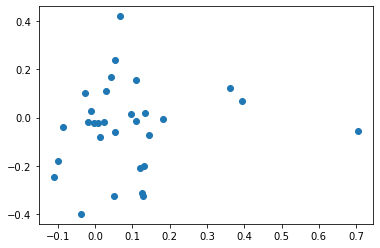

In [27]:
print(pcMat[0])
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(pcMat[0], pcMat[1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [ ]:
# K-means clustering model for unsupervised similarity discovery
# for our first try k=2 (good for anx | not good for anx)
k = 2

In [ ]:
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(df['TotalTHC'], df['TotalCBD'], color='k')
colmap = {1: 'r', 2: 'g'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(0, 80)
# plt.ylim(0, 80)
plt.show()

In [ ]:
df.describe()